In [ ]:
from scipy.io import wavfile
import scipy.signal as ss
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from IPython.display import Audio
import librosa
from librosa import display

In [ ]:
def espectral_single(signal, fs, **kwargs):
    """Transforma o sinal para o domínio da frequência. 
    Pode receber valores adicionais como:
    len -> tamanho da janela.
    window -> tipo de janela

    """
    # váriavel len para capturar parâmetro da função que define tamanho da janela.
    len = kwargs.get('len', None)
    # váriavel window para capturar parâmetro da função que define tipo de janela
    window = kwargs.get('w', None)
    # verificar caso janela tenha informada, nesse caso o calculo da fft é diferente
    if window is not None:
        fft_signal = np.fft.fft(signal*window,(len+1)*signal.shape[0])/signal.shape[0]
    else:
        # fft comum sem janelamento
        fft_signal = np.fft.fft(signal)
    # calculando valor absoluto da fft
    fft_signal = np.abs(fft_signal)
    # deixando fft espelhada em 0 Hz
    fft_signal = np.fft.fftshift(fft_signal)
    # construindo vetor frequência
    freq = np.arange(0,fs,fs/fft_signal.shape[0])-fs/2
    # retornando valor absuluto da fft e vetor frequência
    return fft_signal, freq

def espectral_plot(normalized_magnitude, freq, **kwargs):
    """Plota um gráfico no domínio da frequência. Pode utilizar parâmetros
    adicionais como stem ou max_x (corresponde ao valor maximo de xlim).

    Args:
        normalized_magnitude
        freq
    """
    # settando tamanho da figura
    plt.figure(figsize= (20,5))
    # capturando xlim caso seja passado
    max_x = kwargs.get('xlim', 2000)
    # capturando stem caso seja passado
    stem = kwargs.get('stem')
    # definindo titulo do gráfico
    plt.title(f'FFT')
    # gerando gráfico da fft com o vetor frequência e o sinal transformado
    plt.plot(freq, normalized_magnitude)
    # definindo limite da frequência que será mostrada
    plt.xlim([0,max_x])
  
def espectograma(signal: np.array, fs):
    """Função para gerar espectograma e plotar o gráfico Hz x t
    Primeiro é calculado o valor absuluto da fft do sinal
    Em seguida utiliza-se a função display.specshow da biblioteca librosa. 
    Args:
        signal (numpyarray): [sinal que será transformado]
    """
    # transformando o valor absoluto da fft em decibéis
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)))
    # settando tamanho da figura
    plt.figure(figsize= (20,5))
    # plotando espectograma utilizando o valor em dB
    librosa.display.specshow(D, x_axis='time',y_axis='linear', sr=fs, cmap='jet')
    # formatação das cores e intensidade
    plt.colorbar(format='%+2.0f dB')
    # limite da frequência no gráfico
    plt.ylim([0,2000])
    # colocando grade
    plt.grid(color='w', linewidth=2)

# Projeto

In [ ]:
# leitura do arquivo .wav
data = wavfile.read('/content/audio D.wav')
# definindo variaveis do sinal e da frequência de amostragem contidas no arquivo .wav
signal, fs = librosa.load('/content/audio D.wav', sr=data[0])
# print da frequência de amostragem
print(f'Frequência de amostragem: {fs}')

Frequência de amostragem: 44100


In [ ]:
# Executar áudio
Audio(data=signal, rate=fs)

In [ ]:
# Definindo período
T = 1/fs
# Criando vetor tempo
# t = np.arange(signal.shape[0])*T
t = np.arange(signal.size)/fs

Text(0, 0.5, 'Amplitude')

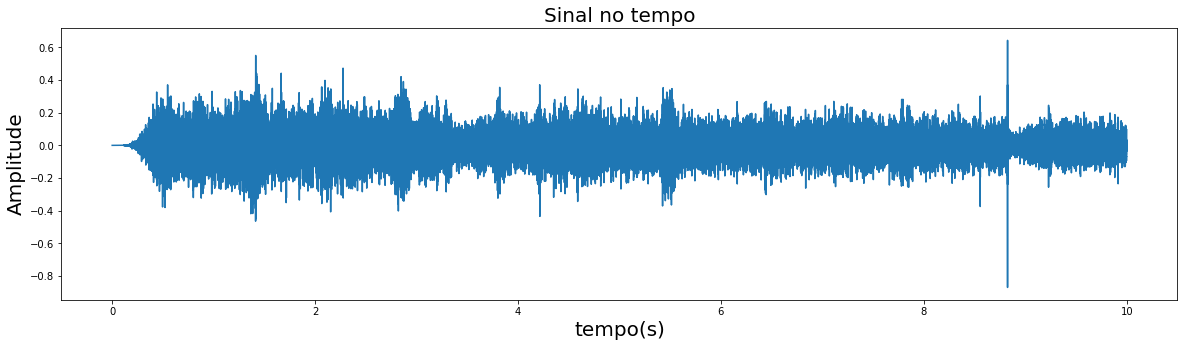

In [ ]:
# Gerando gráfico do sinal bruto no domínio do tempo
g1 = plt.figure(figsize=(20,5))
plt.plot(t, signal)
plt.title('Sinal no tempo', fontsize=20)
plt.xlabel("tempo(s)", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)


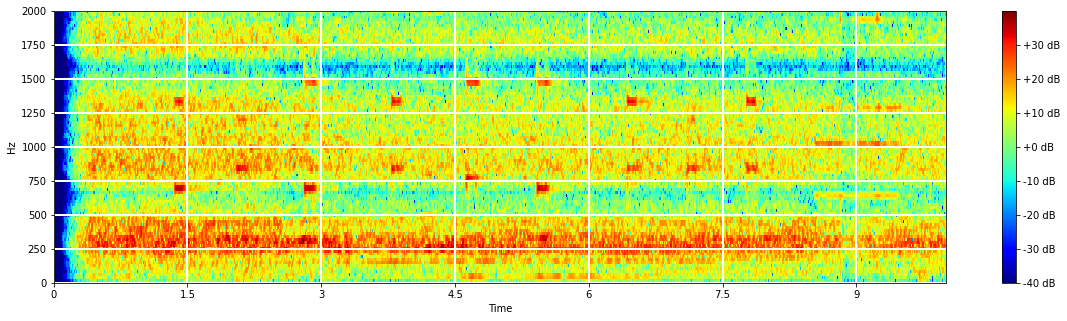

In [ ]:
espectograma(signal, fs)

Já é possível observar as teclas digitadas sem utilizar os filtros porém vamos melhorar o sinal.

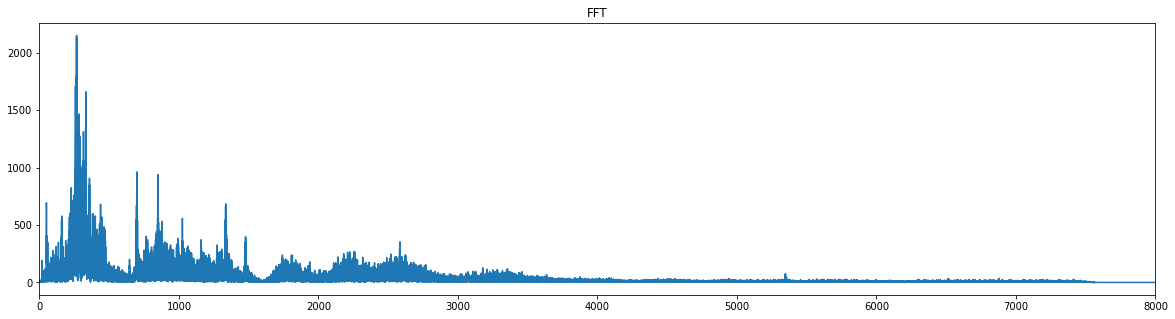

In [ ]:
# Transformada domínio da frequência
datafft, freq = espectral_single(signal, fs)
# Plot da FFT
espectral_plot(datafft, freq, xlim=8000)


### Aplicação do Filtro IIR Anti-aliasing do tipo 1, para que não ocorra o aliasing 


a ordem do filtro necessária é 9


(-40.0, 0.0)

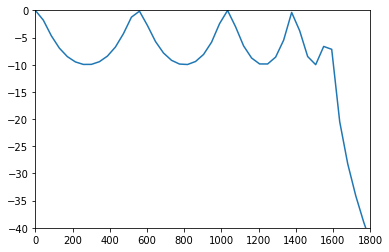

In [ ]:
# construindo um filtro chebyschev tipo 1 passa baixa 

# largura da faixa de transição 200 Hz

#determinando os parametros

Wp = 1600  #frequencia minima banda de transicao
Ws = 1800 #frequencia maxima banda de transicao
Rp = 10 #atenuacao maxima banda de passagem
Rs = 40 #atenuacao minima banda de rejeicao

#determinando a ordem do filtro chebyschev do tipo 1

ord,Wn = ss.cheb1ord(Wp,Ws,Rp,Rs,fs=fs)
print('a ordem do filtro necessária é ' + str(ord))

#projetando o filtro

b,a = ss.cheby1(ord,Rp,Wn,'low',fs=fs)
freq,abss = ss.freqz(b,a,fs=fs)

Db = 20*np.log10(abs(abss))
plt.plot(freq,Db)
plt.xlim([0,1800])
plt.ylim([-40,0])


Text(0, 0.5, 'Magnitude')

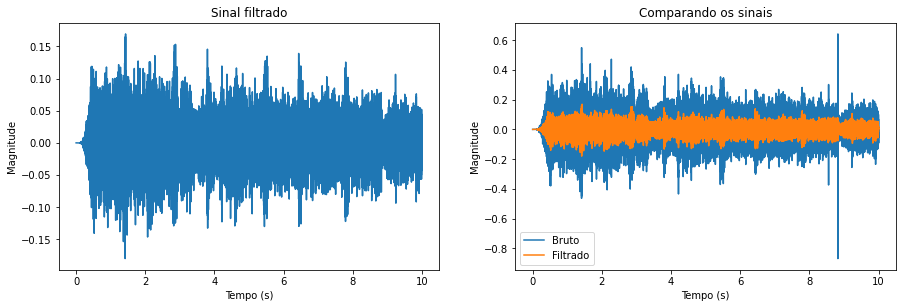

In [ ]:
#filtrando o sinal

filtered = ss.lfilter(b,a,signal)
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(t,filtered)
plt.title('Sinal filtrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')

plt.subplot(222)
plt.plot(t,signal)
plt.plot(t,filtered)
plt.legend(['Bruto','Filtrado'])
plt.title('Comparando os sinais')
plt.xlabel('Tempo (s)')
plt.ylabel('Magnitude')

(0.0, 3000.0)

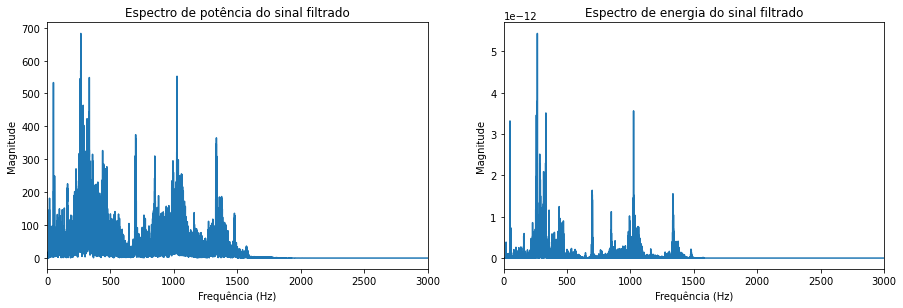

In [ ]:
spec = np.fft.fft(filtered)
mag = np.absolute(spec)
mag = mag/mag.shape[0]
# Fazendo o espectro de energia
e_spec = mag**2/mag.shape[0]
frq = np.arange(0,fs,fs/mag.shape[0])

plt.figure(figsize=(15,10))

plt.subplot(221)
plt.plot(frq,abs(spec))
plt.title('Espectro de potência do sinal filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([0,3000])

plt.subplot(222)
plt.plot(frq,e_spec)
plt.title('Espectro de energia do sinal filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([0,3000])

## Downsampling
    fs mínima será o dobro da frequência máxima (1600 Hz), ou seja, 3200 Hz.
---


k = 44100/3200 = 13 
a freq da reamostragem: 3392.31Hz 


(0.0, 1696.153846153846)

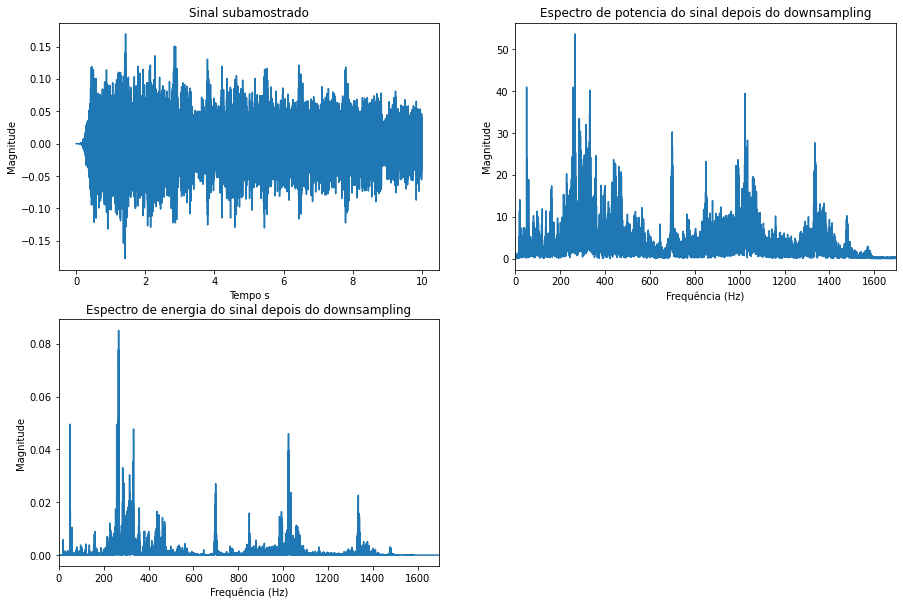

In [ ]:
# calculando o valor de k utilizando um arredondamento para baixo (floor) da frequência de amostragem dividida pela nova frequência vezes 2
k = int(np.floor(fs/3200))

# plotando valor de k
print(f'k = {fs}/3200 = {k} ')

# gerando novo vetor tempo
t_downsample = t[::k]
# gerando nova frequência de amostragem a partir do tempo (apenas para validar)
fsnew = 1/(t_downsample[1]-t_downsample[0])
# realizando downsample no sinal filtrado
signal_downsample = filtered[::k]

# plotando downsample
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(t_downsample,signal_downsample)
plt.title('Sinal subamostrado')
plt.xlabel('Tempo s')
plt.ylabel('Magnitude')

# printando nova frequência de amostragem 
print(f'a freq da reamostragem: {fsnew:.2f}Hz ')

# espectro fft e espectro de energia do sinal que foi subamostrado

fft_downsample = np.fft.fft(signal_downsample)
fft_downsample = np.absolute(fft_downsample)

mag = fft_downsample/fft_downsample.shape[0]

# fazendo o espectro de energia
e_spec = fft_downsample**2/fft_downsample.shape[0]
freq_downsample = np.arange(0,fsnew,fsnew/mag.shape[0])

plt.subplot(222)
plt.plot(freq_downsample, fft_downsample)
plt.title('Espectro de potencia do sinal depois do downsampling')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([0,fsnew/2])

plt.subplot(223)

plt.plot(freq_downsample, e_spec)
plt.title('Espectro de energia do sinal depois do downsampling')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim([0,fsnew/2])

## Filtragem

In [ ]:
# Definindo cortes
lista = [
    694,700, 
    767,773, 
    849, 855, 
    938, 944, 
    1206, 1212, 
    1333, 1339, 
    1474, 1480
    ]

3392.307692307692

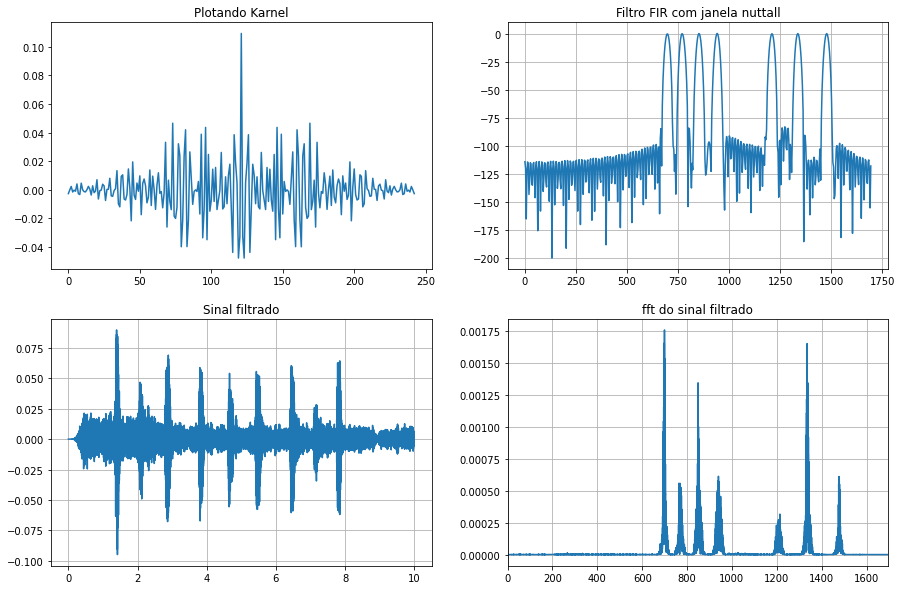

In [ ]:
order = 243

#projetando o karnel para filtro passa banda
h_fir1 = ss.firwin(order,lista,window='hamming',fs=fsnew,pass_zero='bandpass')

#calculando a resposta do filtro em frequencia
freq_fir1, abss_fir1 = ss.freqz(h_fir1,fs=fsnew)
Db_fir1 = 20*np.log(abs(abss_fir1))
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(h_fir1)
plt.title('Plotando Karnel')
plt.subplot(222)
plt.plot(freq_fir1,Db_fir1)
plt.title('Filtro FIR com janela nuttall')
plt.grid('on')

#plotando o sinal antes e depois
filtered_fir1 = np.convolve(h_fir1,signal_downsample,mode='same') #fazendo a filtragem do sinal fazendo a convolução
t = np.arange(filtered_fir1.size)/fsnew
plt.subplot(223)
plt.plot(t,filtered_fir1)
plt.title('Sinal filtrado')
plt.grid('on')

#fft do sinal filtrado
filteredfft_fir1 = abs(2*np.fft.fft(filtered_fir1)/filtered_fir1.shape[0])
freq_fir1 = np.linspace(0,fsnew-1/fsnew,filteredfft_fir1.shape[0])
plt.subplot(224)
plt.plot(freq_fir1,filteredfft_fir1)
plt.title('fft do sinal filtrado')
plt.xlim([0,fsnew/2])
plt.grid('on')
fsnew

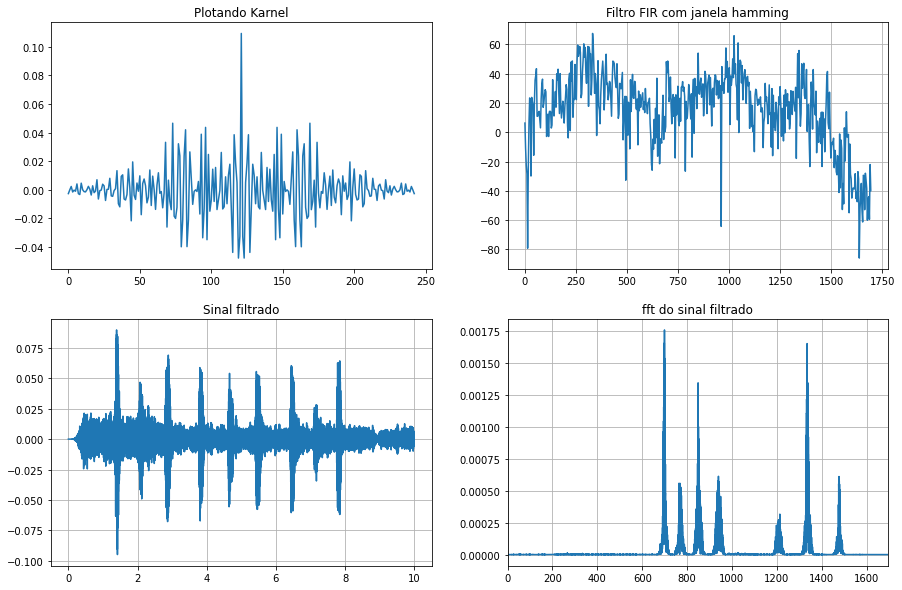

In [ ]:

order = 243

h_fir2 = ss.firwin(order,lista ,window='hamming',fs=fsnew, pass_zero='bandpass')
freq_fir2, abss_fir2 = ss.freqz(signal_downsample,fs=fsnew) 
Db_fir2 = 20*np.log(abs(abss_fir2))

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.plot(h_fir2)
plt.title('Plotando Karnel')
plt.subplot(222)
plt.plot(freq_fir2,Db_fir2)
plt.title('Filtro FIR com janela hamming')
plt.grid('on')


#plotando o sinal antes e depois
filtered_fir2 = np.convolve(h_fir2,signal_downsample,mode='same') #fazendo a filtragem do sinal fazendo a convolução
plt.subplot(223)
plt.plot(t,filtered_fir2)
plt.title('Sinal filtrado')
plt.grid('on')

#fft do sinal filtrado
filteredfft_fir2 = abs(2*np.fft.fft(filtered_fir2)/filtered_fir2.shape[0])
freq_fir2 = np.linspace(0,fsnew-1/fsnew,filteredfft_fir2.shape[0])
plt.subplot(224)
plt.plot(freq_fir2,filteredfft_fir2)
plt.title('fft do sinal filtrado')
plt.xlim([0,fsnew/2])
plt.grid('on')

##  Gerando Espectrograma

(500.0, 1600.0)

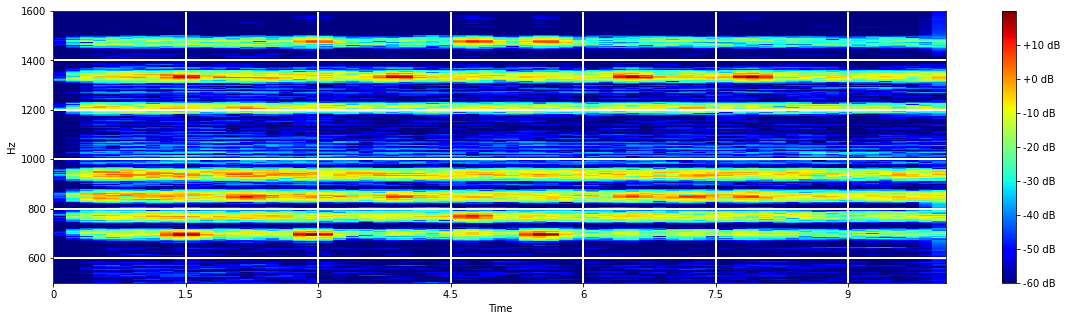

In [ ]:
espectograma(filtered_fir2, fsnew)
plt.ylim([500,1600])

ID|TEMPO(s)|LOW TONE(Hz)|HIGH TONE(Hz)|TECLA
---|---|---|---|---
1|1.5|700|1300|2
2|2.2|850|1200|7
3|3|700|1500|3
4|4.0|850|1330|8
5|4.7|760|1500|6
6|5.7|700|1500|3
7|6.3|850|1330|8
8|6.8|850|1200|7
9|7.3|850|1330|8

In [ ]:
Audio(data=filtered_fir2, rate=fsnew)